In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_cleaned = "Datasets/dc_housing_all_clean-2008-2016.csv"
merged = "Datasets/Merged_Crime_Housing.csv"
pivot = "Datasets/Pivot_Crime_Housing.csv"

In [3]:
merged_df = pd.read_csv(merged)
pivot_df = pd.read_csv(pivot)

In [4]:
pivot_df.head()

,Unnamed: 0,Year,Cluster,Neighborhoods,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
0,0,2008,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1391251,3.0,41.0,99.0,1.0,112.0,147.0,0.0,0.0,564.0,967
1,1,2009,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",955000,1.0,45.0,91.0,1.0,75.0,116.0,1.0,138.0,396.0,864
2,2,2010,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1170000,0.0,32.0,61.0,2.0,82.0,102.0,6.0,313.0,268.0,866
3,3,2011,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1455000,0.0,41.0,65.0,2.0,65.0,122.0,5.0,408.0,312.0,1020
4,4,2012,Cluster 1,"Kalorama Heights, Adams Morgan, Lanier Heights",1060000,0.0,38.0,56.0,0.0,43.0,120.0,2.0,342.0,364.0,965


In [5]:
# calculate percent change from 2008 to 2016
price_2008 = pivot_df.loc[pivot_df["Year"]==2008]
price_2016 = pivot_df.loc[pivot_df["Year"]==2016]
values_2008 = price_2008["Median_Price"].values
values_2016 =  price_2016["Median_Price"].values
diff = values_2016-values_2008
diff_percent = diff/values_2008
diff_percent_format = diff_percent*100
df_2016 = pd.DataFrame(price_2016)
clusters = df_2016["Cluster"]
change_over_time_df = pd.DataFrame({"Cluster":clusters, "2008 Price": values_2008, "2016 Price": values_2016, "% Change in Price":diff_percent_format})
change_over_time_df_reset = change_over_time_df.reset_index()

In [7]:
change_over_time_df_reset["index"]
clean_df = change_over_time_df_reset.drop(["index"], axis=1)
clean_df.head(10)

,Cluster,2008 Price,2016 Price,% Change in Price
0,Cluster 1,1391251,1930000,38.724069
1,Cluster 2,530000,760000,43.396226
2,Cluster 3,637800,860000,34.838507
3,Cluster 4,1237500,1295000,4.646465
4,Cluster 5,932000,797500,-14.431330
5,Cluster 6,890000,1210000,35.955056
6,Cluster 7,515000,890001,72.815728
7,Cluster 8,373950,785000,109.921112
8,Cluster 9,650000,880500,35.461538
9,Cluster 10,862000,975000,13.109049


In [8]:
# make lists to hold relative wealth (RW) & calculate interquartiles for low mid and high RW

relative_wealth_2008 = []
relative_wealth_2016 = []

lowest_value_2008 = clean_df["2008 Price"].min()
mid_value_2008 = clean_df["2008 Price"].mean()
highest_value_2008 = clean_df["2008 Price"].max()
lowmid_mean_2008 = (mid_value_2008+lowest_value_2008)/2
midhigh_mean_2008 = (mid_value_2008+highest_value_2008)/2

lowest_value_2016 = clean_df["2016 Price"].min()
mid_value_2016 = clean_df["2016 Price"].mean()
highest_value_2016 = clean_df["2016 Price"].max()
lowmid_mean_2016 = (mid_value_2016+lowest_value_2016)/2
midhigh_mean_2016 = (mid_value_2016+highest_value_2016)/2

In [9]:
# make conditionals for RW append RW values to lists

for cluster in clean_df["2008 Price"]:
    if cluster < lowmid_mean_2008:
        relative_wealth_2008.append("low")
    elif cluster >= lowmid_mean_2008 and cluster <= midhigh_mean_2008:
        relative_wealth_2008.append("mid")
    elif cluster > midhigh_mean_2008:
        relative_wealth_2008.append("high")
        
for cluster in clean_df["2016 Price"]:
    if cluster < lowmid_mean_2016:
        relative_wealth_2016.append("low")
    elif cluster >= lowmid_mean_2016 and cluster <= midhigh_mean_2016:
        relative_wealth_2016.append("mid")
    elif cluster > midhigh_mean_2016:
        relative_wealth_2016.append("high")

In [11]:
# add RW value columns to dataframe

clean_df["Relative Wealth in 2008"] = relative_wealth_2008
clean_df["Relative Wealth in 2016"] = relative_wealth_2016
clean_df.head(10)

,Cluster,2008 Price,2016 Price,% Change in Price,Relative Wealth in 2008,Relative Wealth in 2016
0,Cluster 1,1391251,1930000,38.724069,high,high
1,Cluster 2,530000,760000,43.396226,mid,mid
2,Cluster 3,637800,860000,34.838507,mid,mid
3,Cluster 4,1237500,1295000,4.646465,high,mid
4,Cluster 5,932000,797500,-14.431330,mid,mid
5,Cluster 6,890000,1210000,35.955056,mid,mid
6,Cluster 7,515000,890001,72.815728,mid,mid
7,Cluster 8,373950,785000,109.921112,low,mid
8,Cluster 9,650000,880500,35.461538,mid,mid
9,Cluster 10,862000,975000,13.109049,mid,mid


In [12]:
# sort to find greatest changes

pd.DataFrame.sort_values(clean_df,by = "% Change in Price",ascending=False)

,Cluster,2008 Price,2016 Price,% Change in Price,Relative Wealth in 2008,Relative Wealth in 2016
26,Cluster 27,355000,925012,160.566761,low,mid
7,Cluster 8,373950,785000,109.921112,low,mid
20,Cluster 21,387500,733700,89.341935,low,mid
6,Cluster 7,515000,890001,72.815728,mid,mid
21,Cluster 22,363895,577500,58.699625,low,mid
17,Cluster 18,415000,650000,56.626506,mid,mid
14,Cluster 15,940000,1462500,55.585106,mid,high
27,Cluster 28,260000,396550,52.519231,low,low
24,Cluster 25,465000,705000,51.612903,mid,mid
18,Cluster 19,300000,445000,48.333333,low,low


In [13]:
# plot interesting clusters
greatest_increase_value = pivot_df[pivot_df.Cluster == "Cluster 27"]
greatest_decrease_value = pivot_df[pivot_df.Cluster == "Cluster 5"]
least_change_value = pivot_df[pivot_df.Cluster == "Cluster 33"]

control_wealth_high = pivot_df[pivot_df.Cluster == "Cluster 12"]
control_wealth_mid = pivot_df[pivot_df.Cluster == "Cluster 10"]
control_wealth_low = pivot_df[pivot_df.Cluster == "Cluster 33"]

greatest_increase_rw_midhigh = pivot_df[pivot_df.Cluster == "Cluster 15"]
greatest_increase_rw_lowmid = pivot_df[pivot_df.Cluster == "Cluster 17"] #really 27 but we've done that already and 2nd place (8) is buggy
greatest_decrease_rw_highmid = pivot_df[pivot_df.Cluster == "Cluster 13"]
greatest_decrease_rw_midlow = pivot_df[pivot_df.Cluster == "Cluster 35"]

Text(0.5, 1.0, 'Percent Change in Median House Price by Neighborhood Cluster from 2008 to 2016')

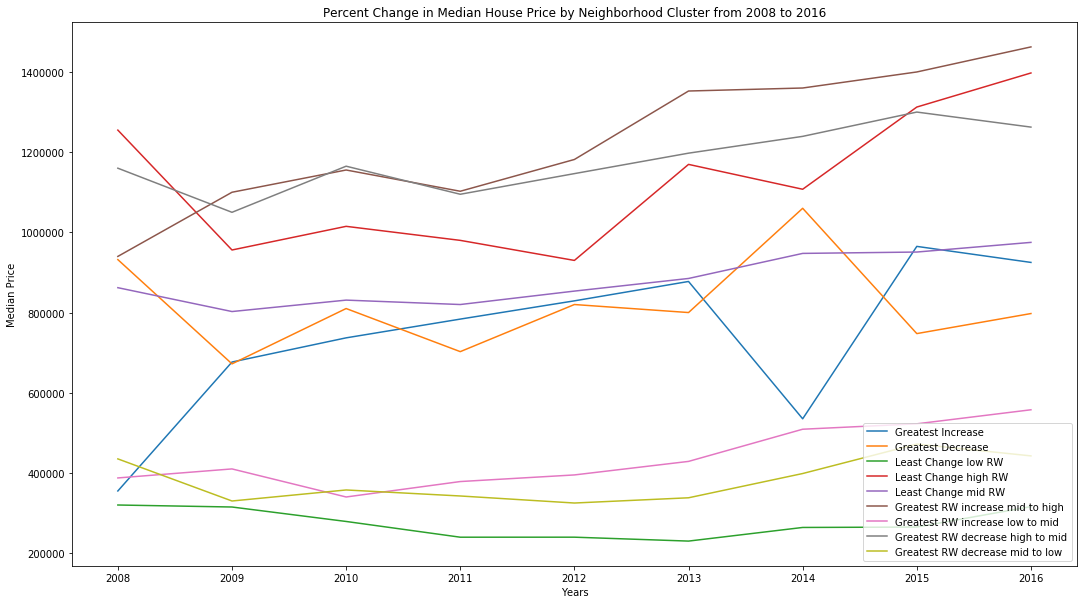

In [16]:
years = np.array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
figure, axes = plt.subplots(figsize = (18,10))
plt.plot(years, greatest_increase_value["Median_Price"].values, label = "Greatest Increase")
plt.plot(years, greatest_decrease_value["Median_Price"].values, label = "Greatest Decrease")
plt.plot(years, least_change_value["Median_Price"].values, label = "Least Change low RW")
plt.plot(years, control_wealth_high["Median_Price"].values, label = "Least Change high RW")
plt.plot(years, control_wealth_mid["Median_Price"].values, label = "Least Change mid RW")
plt.plot(years, greatest_increase_rw_midhigh["Median_Price"].values, label = "Greatest RW increase mid to high")
plt.plot(years, greatest_increase_rw_lowmid["Median_Price"].values, label = "Greatest RW increase low to mid")
plt.plot(years, greatest_decrease_rw_highmid["Median_Price"].values, label = "Greatest RW decrease high to mid")
plt.plot(years, greatest_decrease_rw_midlow["Median_Price"].values, label = "Greatest RW decrease mid to low")
plt.ylabel("Median Price")
plt.xlabel("Years")
plt.legend(loc=4)
plt.title("Percent Change in Median House Price by Neighborhood Cluster from 2008 to 2016")

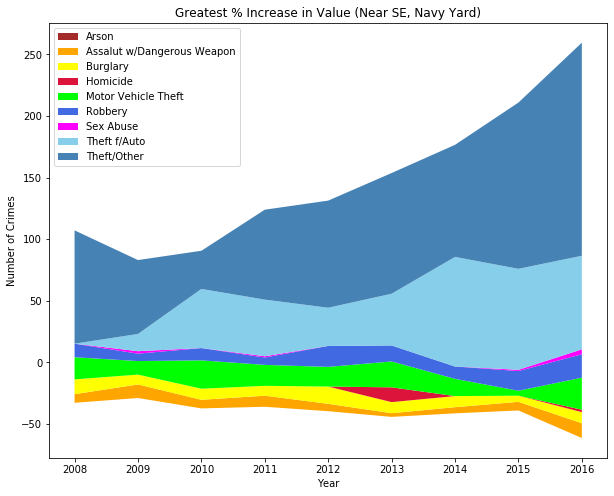

In [17]:
# Plot greatest increase cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_increase_value["ARSON"]
y2 = greatest_increase_value["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_increase_value["BURGLARY"]
y4 = greatest_increase_value["HOMICIDE"]
y5 = greatest_increase_value["MOTOR VEHICLE THEFT"]
y6 = greatest_increase_value["ROBBERY"]
y7 = greatest_increase_value["SEX ABUSE"]
y8 = greatest_increase_value["THEFT F/AUTO"]
y9 = greatest_increase_value["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest % Increase in Value (Near SE, Navy Yard)")
plt.show()

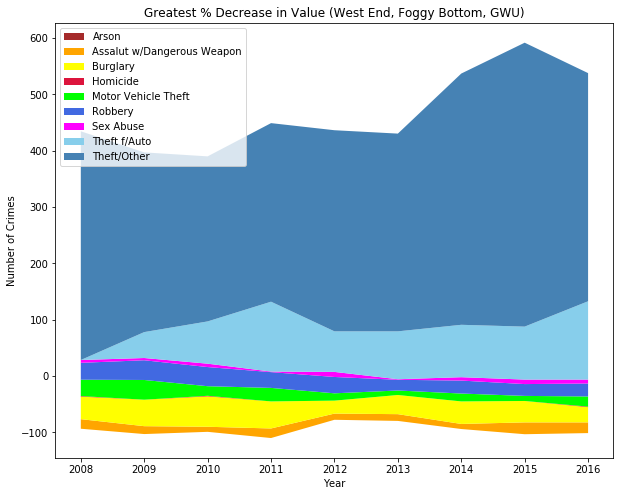

In [18]:
# Plot greatest decrease cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_decrease_value["ARSON"]
y2 = greatest_decrease_value["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_decrease_value["BURGLARY"]
y4 = greatest_decrease_value["HOMICIDE"]
y5 = greatest_decrease_value["MOTOR VEHICLE THEFT"]
y6 = greatest_decrease_value["ROBBERY"]
y7 = greatest_decrease_value["SEX ABUSE"]
y8 = greatest_decrease_value["THEFT F/AUTO"]
y9 = greatest_decrease_value["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest % Decrease in Value (West End, Foggy Bottom, GWU)")
plt.show()

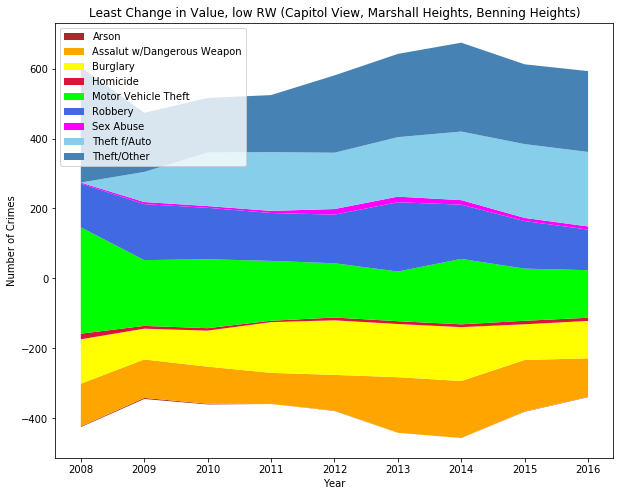

In [19]:
# Plot least change cluster low RW
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = least_change_value["ARSON"]
y2 = least_change_value["ASSAULT W/DANGEROUS WEAPON"]
y3 = least_change_value["BURGLARY"]
y4 = least_change_value["HOMICIDE"]
y5 = least_change_value["MOTOR VEHICLE THEFT"]
y6 = least_change_value["ROBBERY"]
y7 = least_change_value["SEX ABUSE"]
y8 = least_change_value["THEFT F/AUTO"]
y9 = least_change_value["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Least Change in Value, low RW (Capitol View, Marshall Heights, Benning Heights)")
plt.show()

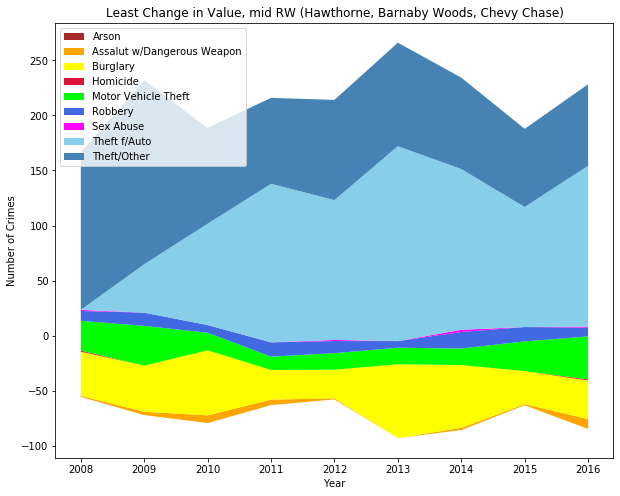

In [20]:
# Plot least changed cluster mid RW
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = control_wealth_mid["ARSON"]
y2 = control_wealth_mid["ASSAULT W/DANGEROUS WEAPON"]
y3 = control_wealth_mid["BURGLARY"]
y4 = control_wealth_mid["HOMICIDE"]
y5 = control_wealth_mid["MOTOR VEHICLE THEFT"]
y6 = control_wealth_mid["ROBBERY"]
y7 = control_wealth_mid["SEX ABUSE"]
y8 = control_wealth_mid["THEFT F/AUTO"]
y9 = control_wealth_mid["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Least Change in Value, mid RW (Hawthorne, Barnaby Woods, Chevy Chase)")
plt.show()

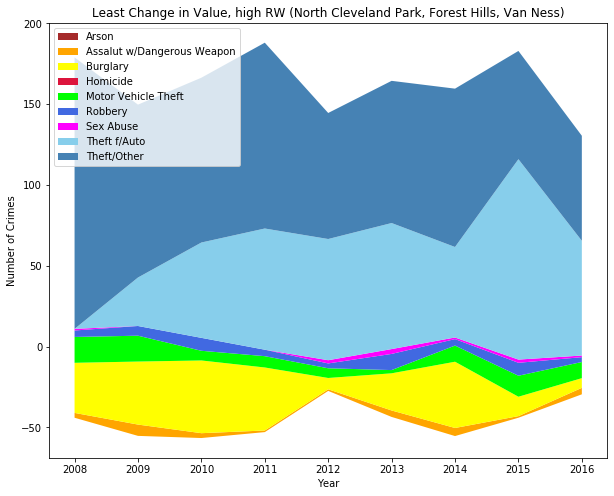

In [21]:
# Plot least changed cluster high RW
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = control_wealth_high["ARSON"]
y2 = control_wealth_high["ASSAULT W/DANGEROUS WEAPON"]
y3 = control_wealth_high["BURGLARY"]
y4 = control_wealth_high["HOMICIDE"]
y5 = control_wealth_high["MOTOR VEHICLE THEFT"]
y6 = control_wealth_high["ROBBERY"]
y7 = control_wealth_high["SEX ABUSE"]
y8 = control_wealth_high["THEFT F/AUTO"]
y9 = control_wealth_high["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Least Change in Value, high RW (North Cleveland Park, Forest Hills, Van Ness)")
plt.show()

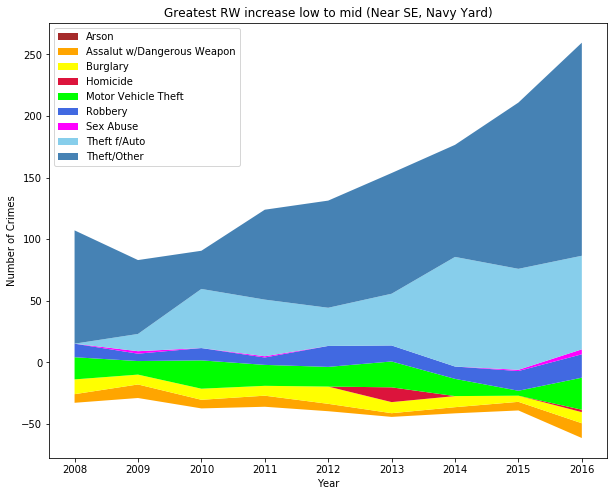

In [22]:
# Plot greatest increase low to mid RW cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_increase_value["ARSON"]
y2 = greatest_increase_value["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_increase_value["BURGLARY"]
y4 = greatest_increase_value["HOMICIDE"]
y5 = greatest_increase_value["MOTOR VEHICLE THEFT"]
y6 = greatest_increase_value["ROBBERY"]
y7 = greatest_increase_value["SEX ABUSE"]
y8 = greatest_increase_value["THEFT F/AUTO"]
y9 = greatest_increase_value["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest RW increase low to mid (Near SE, Navy Yard)")
plt.show()

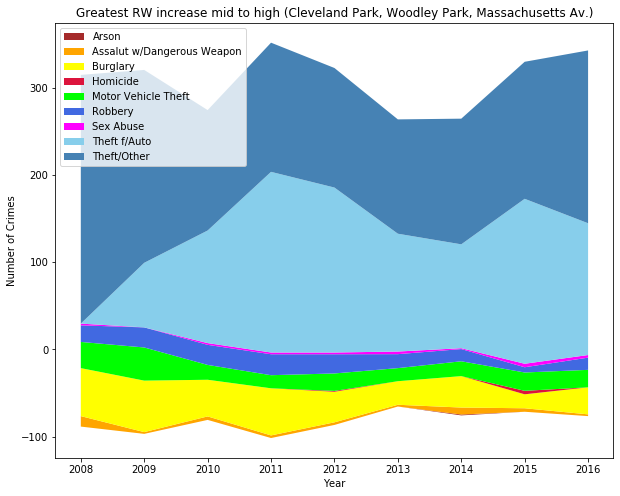

In [23]:
# Plot greatest increase mid to high RW cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_increase_rw_midhigh["ARSON"]
y2 = greatest_increase_rw_midhigh["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_increase_rw_midhigh["BURGLARY"]
y4 = greatest_increase_rw_midhigh["HOMICIDE"]
y5 = greatest_increase_rw_midhigh["MOTOR VEHICLE THEFT"]
y6 = greatest_increase_rw_midhigh["ROBBERY"]
y7 = greatest_increase_rw_midhigh["SEX ABUSE"]
y8 = greatest_increase_rw_midhigh["THEFT F/AUTO"]
y9 = greatest_increase_rw_midhigh["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest RW increase mid to high (Cleveland Park, Woodley Park, Massachusetts Av.)")
plt.show()

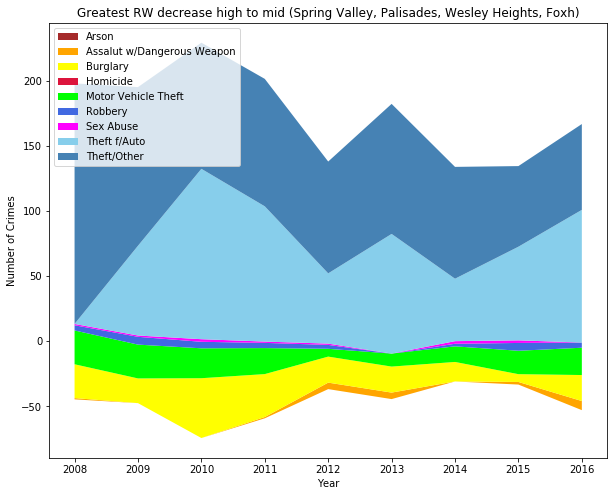

In [24]:
# Plot greatest decrease high to mid RW cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_decrease_rw_highmid["ARSON"]
y2 = greatest_decrease_rw_highmid["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_decrease_rw_highmid["BURGLARY"]
y4 = greatest_decrease_rw_highmid["HOMICIDE"]
y5 = greatest_decrease_rw_highmid["MOTOR VEHICLE THEFT"]
y6 = greatest_decrease_rw_highmid["ROBBERY"]
y7 = greatest_decrease_rw_highmid["SEX ABUSE"]
y8 = greatest_decrease_rw_highmid["THEFT F/AUTO"]
y9 = greatest_decrease_rw_highmid["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest RW decrease high to mid (Spring Valley, Palisades, Wesley Heights, Foxh)")
plt.show()

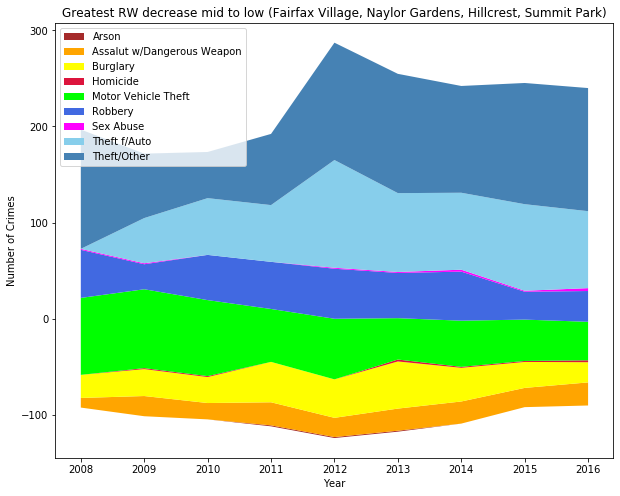

In [25]:
# Plot greatest decrease mid to low RW cluster
x = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = greatest_decrease_rw_midlow["ARSON"]
y2 = greatest_decrease_rw_midlow["ASSAULT W/DANGEROUS WEAPON"]
y3 = greatest_decrease_rw_midlow["BURGLARY"]
y4 = greatest_decrease_rw_midlow["HOMICIDE"]
y5 = greatest_decrease_rw_midlow["MOTOR VEHICLE THEFT"]
y6 = greatest_decrease_rw_midlow["ROBBERY"]
y7 = greatest_decrease_rw_midlow["SEX ABUSE"]
y8 = greatest_decrease_rw_midlow["THEFT F/AUTO"]
y9 = greatest_decrease_rw_midlow["THEFT/OTHER"]
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Arson", "Assalut w/Dangerous Weapon", "Burglary", "Homicide", "Motor Vehicle Theft", "Robbery", "Sex Abuse",
         "Theft f/Auto", "Theft/Other"]
fig, ax = plt.subplots(figsize =(10,8))
ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels, colors = ["brown", "orange", "yellow", "crimson", "lime", "royalblue", "magenta", "skyblue", "steelblue",], baseline = 'wiggle')
ax.legend(loc='upper left')
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Year")
ax.set_title("Greatest RW decrease mid to low (Fairfax Village, Naylor Gardens, Hillcrest, Summit Park)")
plt.show()